# Climate Analysis

In [2]:

#### Deliverable 2: Determining the Summary Statistics for December 

# Using Python, Pandas functions and methods, and SQLAlchemy, you’ll filter the date column of the Measurements table in the hawaii.sqlite database to retrieve all the temperatures for the month of December. You’ll then convert those temperatures to a list, create a DataFrame from the list, and generate the summary statistics.

# ----------------------------------

#### Deliverable 3: The statistical analysis Report

# For this part of the Challenge, write a report that describes the 
# * key differences in weather between June and December and 
# * two recommendations for further analysis.


## Deliverable 1: Determining the Summary Statistics for June

##### Using Python, Pandas functions and methods, and SQLAlchemy, you’ll filter the date column of the Measurements table in the hawaii.sqlite database to retrieve all the temperatures for the month of June. You’ll then convert those temperatures to a list, create a DataFrame from the list, and generate the summary statistics.



In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# In order to connect to our SQLite database, we need to use the create_engine() function
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# !(Reflecting a database into a new model essentially means to transfer the contents
# of the database into a different structure of data with the automap_base() function.)

# reflect an existing database into a new model . 
Base = automap_base()

# !(To keep our code decoupled, we reflect tables by creating classes that help keep our code separate.)
# reflect the tables

Base.prepare(engine, reflect=True)

In [9]:
# ! (Our data is no longer stored in tables, but rather in classes. 
# The code we will run enables us to essentially copy, or reflect, our data into 
# different classes instead of database tables).

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# ! (In order to reference a specific class, we use Base.classes.<class name>. 
# Since it can be rather cumbersome to type Base.classes every time we want to 
# reference the measurement or station classes, we can give the classes new variable names).

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
session

# Exploratory Climate Analysis

In [13]:
# ! (We will calculate the date one year from August 23, 2017 (Mr. W. Avy's favorite day). 
# We'll be creating a variable called prev_year and using the datetime dependency 
# that we imported previously). The datetime dependency has a function called dt.date(), 
# which specifies the date in the following format: year, month, day.)


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)


# ! (But we want the amount of precipitation one year back from this date. So we add the 
# dt.timedelta() function to the previous line of code).

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# ! (We'll begin quesry first by creating a variable to store the results of the query . 
# This variable will be called results)

# Perform a query to retrieve the data and precipitation scores
results = []

# results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

# ! (Since we only want to see the most recent data, we need to filter out all of the data 
# that is older than a year from the last record date.)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [14]:
# ! (In order to save our results as a DataFrame, we need to provide our results variable 
# as one parameter and specify the column names as our second parameter.)

# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(results, columns=['date','precipitation'])

In [15]:
df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# !(The first column is auto-generated and contains the row number. However, we want the 
# index column to be the date column, so we'll need to get rid of those row numbers.)

df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [17]:
df.set_index(df['date'], inplace=False)

print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [18]:
# !(For this task, we'll need to use a slightly different print statement. 
# First we'll convert the DataFrame to strings, and then we'll set our index to "False.")
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [19]:
# ! (We're going to sort the values by date using the sort_index() function.)
df = df.sort_index()

In [20]:
# ! (to print the sorted list without the index, we will use:)
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

<AxesSubplot:xlabel='date'>

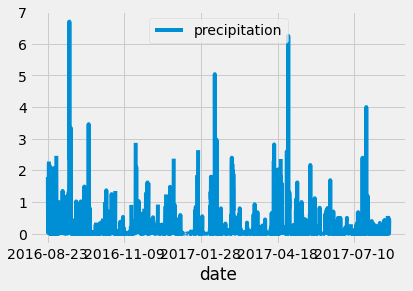

In [21]:
# ! ( We'll be using Matplotlib to plot the DataFrame, which is represented as 
# the variable df, we can use the df.plot() function.  )
df.plot()

In [24]:
# (to implement theme background)
from jupyterthemes import jtplot
jtplot.style()

<AxesSubplot:xlabel='date'>

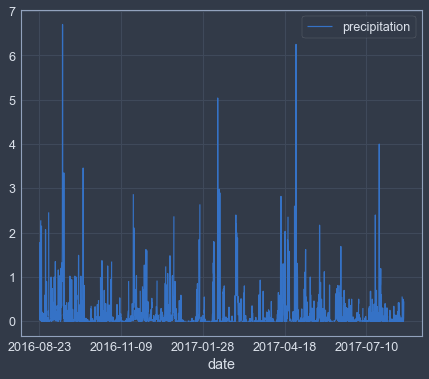

In [25]:
df.plot()

In [26]:
# ! (We will use Pandas function for the calculations of mean, standard deviation, 
# minimum, and maximum, standard deviation, and percentiles)
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# ! We need to write a query to get the number of stations in our dataset. 
# We'll use our session that we created earlier to query our database.
# session.query() but we'll also add func.count, which essentially counts a given dataset 
# to count the total number of stations. We can do this by referencing Station.station
# session.query(func.count(Station.station))
# But we need to add the .all() function to the end of this query so that our results are returned as a list.
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [28]:
# ! (Now that we've found the total number of stations, we need to run a query to determine the 
# mostactive stations. We begin with session.query() function to start every query in SQLAlchemy.
# We want to group the data by the station name, and then order by the count for each station in 
# descending order. The group_by() function for SQLite is the same as groupby() we preously were using.
# We also need to add order_by function to order the results in the order that we specify, descending.
# We need to add the .all() function to return all of the results of our query.) 

# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# ! (Next, we will calculate the minimum, maximum, and average temperatures with the 
# following functions: func.min, func.max, and func.avg and adding them to the query), 
# add one filter to filter out everything but the station,and
# finally, add the .all() function to return our results as a list.)

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [30]:
# ! (To create a query, first select the column we are interested in. We want to pull Measurement.tobs 
# in order to get our total observations count. 
# filter out all the stations except the most active station by filter(Measurement.station == 'USC00519281')
# add the .all() function to save our results as a list.
# and add a print statement around it.)


# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [31]:
# ! (A DataFrame is the best way to make the data easier to read.
# When creating a DataFrame, our first parameter is our list, and the second parameter is the column(s) 
# In this case, temperature observations result list into a DataFrame.
# and finally adding a print(df) statement after the last line and run the code.)

df = pd.DataFrame(results, columns=['tobs'])

print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


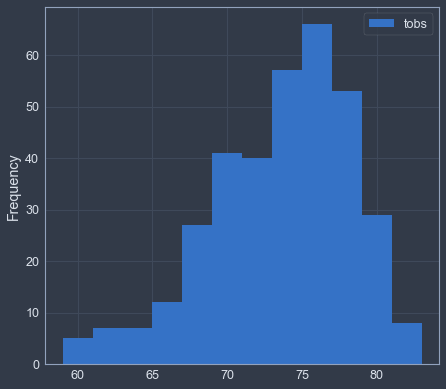

In [33]:
# ! (Now, We'll be creating a histogram from the temperature observations. 
# This will allow us to quickly count how many temperature observations we have.)
# To create the histogram, we need to use the plot() function and the hist() function 
# and add the number of bins as a parameter. It's recommended to stay within a range of 5 to 20 bins.
# We're going to divide our temperature observations into 12 different bins. 
#  we don't need to specify the ranges to specify the number of bins (just add the number of bins)
# Using plt.tight_layout(), we can compress the x-axis labels to fit them into the box holding our plot.)
df.plot.hist(bins=12)
plt.tight_layout()

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge